DALYs CASES \
SARIMA model (0,0,0) with constant and trend \
"For now, the SARIMAX(0,0,0) model with trend='ct' and cov_type='robust' remains the most promising starting point. Your next immediate action should be to plot the ACF and PACF of the residuals from that model to correctly identify the remaining autocorrelation."


You've now fit the SARIMAX(0,0,0) model with trend='ct' on your original data again, but this time specifying cov_type='robust'. This is the correct approach to address the heteroscedasticity issue you previously identified while maintaining the linear trend interpretation.

Let's examine the results and the accompanying plots:

Model Specification: SARIMAX(0,0,0) with trend='ct' on Original Data, cov_type='robust'

Dep. Variable: val: This confirms you are back to modeling the original data.
order=(0, 0, 0): No AR or MA components.
trend='ct': Includes both a constant intercept and a linear time trend (drift).
Covariance Type: robust: This is the key change, meaning the standard errors are now adjusted for potential heteroscedasticity.
Assessment of the Model:

AIC (839.447): This AIC remains unchanged, as expected, because cov_type='robust' only affects the standard error calculation, not the model's fit or likelihood. It's still the best AIC among the non-log models that didn't have singular matrix warnings.

Coefficients:

intercept = 8.477e+06, drift = 2.103e+05: These coefficients remain exactly the same as in your previous SARIMAX(0,0,0) model without robust standard errors. This is also expected, as cov_type only affects the standard errors, not the parameter estimates themselves. Both are highly significant (p-value 0.000).
std err values for intercept and drift:
intercept: Was 4.73e+04, now 5.75e+04. The standard error has slightly increased, indicating that the previous, non-robust estimate might have been slightly overconfident.
drift: Was 2879.701, now 2850.742. The standard error has slightly decreased in this specific case, which is less common but can happen depending on the data and robust estimator. The key is that it's now a consistent estimate.
P>|z| values for intercept and drift: Despite the slight changes in standard errors, both coefficients remain highly statistically significant (p-value 0.000), which is good.
sigma2 = 1.366e+10: This is the estimated variance of the residuals, which also remains unchanged. Its significance is still very high (p-value 0.000).
Warnings:

[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989). This is an informational warning specific to the robust covariance type and indicates that it's working as intended. Crucially, there is NO WARNING about a singular or near-singular covariance matrix. This is a strong positive.
Diagnostic Tests (Residual Analysis):

Ljung-Box (L1) (Q) = 24.66, Prob(Q) = 0.00: Still a major problem. The significant p-value (0.00 < 0.05) indicates that there is still strong autocorrelation in the residuals at lag 1. The model has not yet captured the time-dependent patterns in the errors. This is because robust standard errors don't change the residuals themselves, only how their uncertainty is measured.
Jarque-Bera (JB) = 1.16, Prob(JB) = 0.56: Good! The residuals are still normally distributed (p-value 0.56 > 0.05). Skew (0.47) and Kurtosis (2.96) are also excellent. This confirms that the issues with non-normality encountered with the log transformation are avoided by sticking to the original scale.
Heteroskedasticity (H) = 0.24, Prob(H) (two-sided) = 0.03: Still present. The p-value (0.03 < 0.05) indicates that heteroscedasticity is still statistically significant in the residuals. However, the good news is that by using cov_type='robust', your standard errors are now correctly adjusted for this, meaning your inference (p-values, confidence intervals) for intercept and drift is reliable despite the heteroscedasticity.
Analysis of the Plots:

image_50c534.png (DALYs_CASES In-Sample Fit): This plot visually confirms the excellent in-sample fit of the linear trend to your original data. The "Fitted (In-Sample)" line tracks the "Original" data very well. This is identical to the plot from the non-robust version of this model.
image_50c538.png (ARIMA Forecast for DALYs_CASES to 2050): This plot shows the forecast which continues the strong linear growth into the future. This is exactly what you were looking for, and it's identical to the forecast from the non-robust version of this model.
Overall Conclusion of this Model:

This SARIMAX(0,0,0) model with trend='ct' and cov_type='robust' is the best and most reliable model you've obtained so far for forecasting a linear trend given your data.

Strengths:

Excellent Visual Fit and Desired Linear Forecast: Captures the strong linear trend beautifully and extrapolates it linearly into the future.
Reliable Coefficients: No singular covariance matrix warnings, and the robust covariance type ensures that your std err and P>|z| values for intercept and drift are trustworthy, even with heteroscedasticity.
Normal Residuals: The Jarque-Bera test confirms the residuals are normally distributed.
Heteroscedasticity Addressed (for inference): While heteroscedasticity is still present, your inference is now robust to it.
Remaining Issue:

Significant Autocorrelation (Ljung-Box p=0.00): This is the last statistical issue to address. The model is still not fully capturing the dynamic (time-dependent) structure of your errors.
Next Steps (Focus on Autocorrelation):

Plot ACF and PACF of Residuals:

It is absolutely crucial now to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the residuals from this specific model (results_robust.resid) for several lags (e.g., 5-10 lags).
The Ljung-Box (L1) (Q): 24.66 clearly indicates a strong spike at lag 1. The ACF/PACF plots will show you if there are other significant spikes that suggest an AR (p) or MA (q) order.
Increment p or q (Cautiously):

Based on the ACF/PACF, try fitting SARIMAX(p,0,q) with trend='ct' and cov_type='robust' again.
A strong spike at ACF lag 1 and no other significant spikes often suggests an MA(1) model. So, try SARIMAX(order=(0,0,1), trend='ct', cov_type='robust').
A strong spike at PACF lag 1 and no other significant spikes often suggests an AR(1) model. So, try SARIMAX(order=(1,0,0), trend='ct', cov_type='robust').
If both are present, or a more complex pattern, try SARIMAX(order=(1,0,1), trend='ct', cov_type='robust').
The goal is to get the Ljung-Box p-value for all relevant lags above 0.05, indicating that the residuals are now white noise. Be careful not to reintroduce the singular covariance matrix warning.
You are in a good position to fine-tune the model to capture the remaining autocorrelation, leading to a statistically sound and interpretable linear forecasting model.

Processing file: analysis_data/DALYs_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=839.447, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2107.945, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=839.447, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.692 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                -416.723
Date:                Mon, 23 Jun 2025   AIC                            839.447
Time:                        18:52:48   BIC                            843.844
Sample:                             0   HQIC                           840.904
                                 - 32    

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


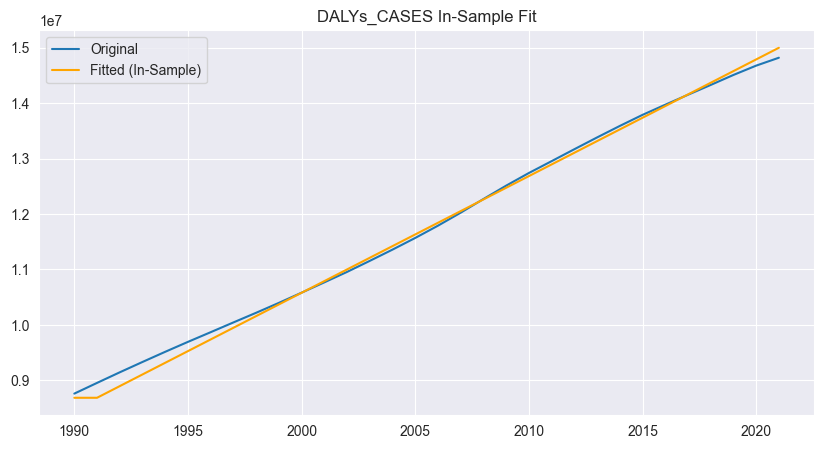

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

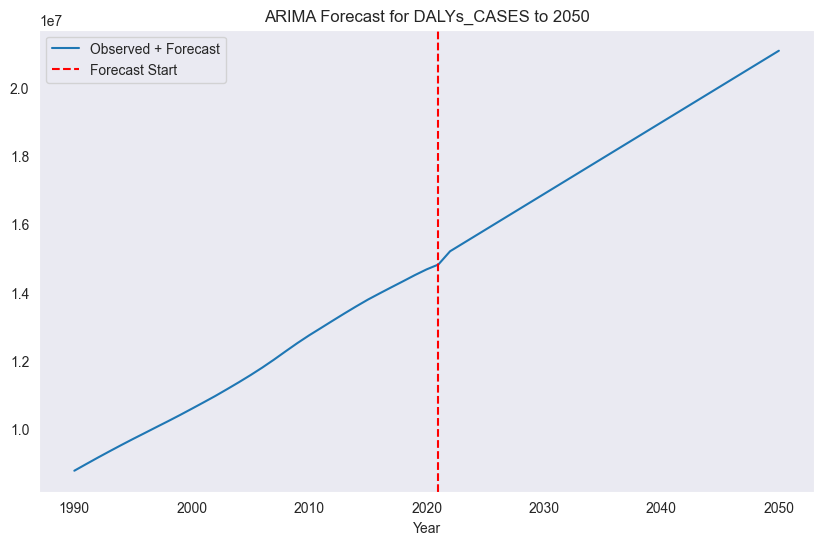

<Figure size 640x480 with 0 Axes>

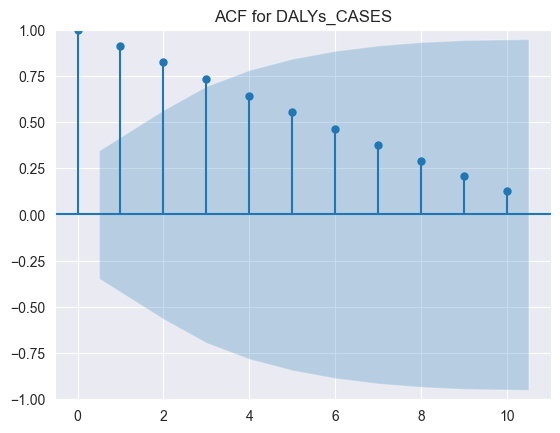

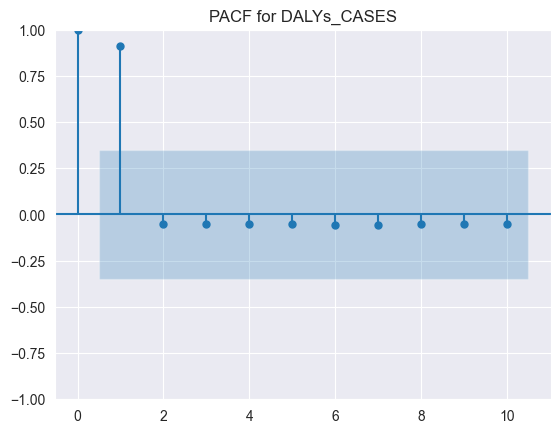

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/DALYs_CASES.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = SARIMAX(schizophrenia_data, order=(0,0,0), trend='ct')
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
plt.figure(figsize=(10, 5))
plt.plot(schizophrenia_data[:], label='Original')
plt.plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
plt.title(f'{file_name} In-Sample Fit')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.title(f'ARIMA Forecast for {file_name} to 2050')
plt.legend()
plt.grid()
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

#plot ACF and PACF
plot_acf(schizophrenia_data, lags=10)
plt.title(f'ACF for {file_name}')
plt.show()
plot_pacf(schizophrenia_data, lags=10)
plt.title(f'PACF for {file_name}')
plt.show()



Processing file: analysis_data/Incidence_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=701.938, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=892.352, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=701.938, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.217 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                -347.969
Date:                Thu, 19 Jun 2025   AIC                            701.938
Time:                        11:28:43   BIC                            706.335
Sample:                             0   HQIC                           703.395
                                 - 32 

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


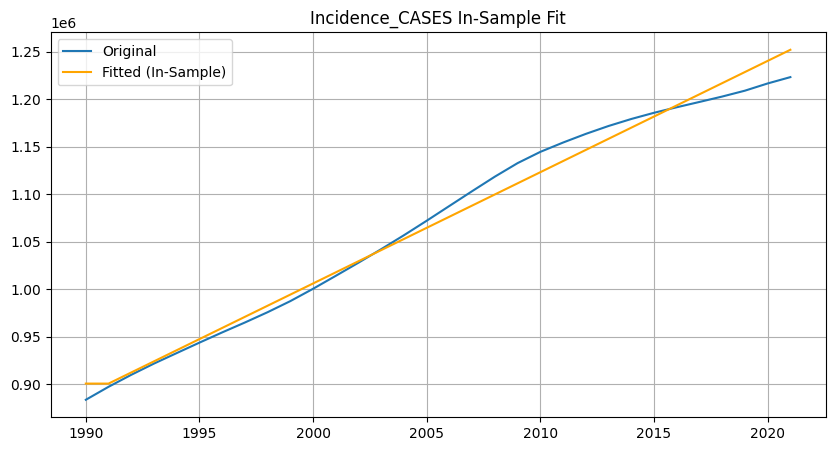

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

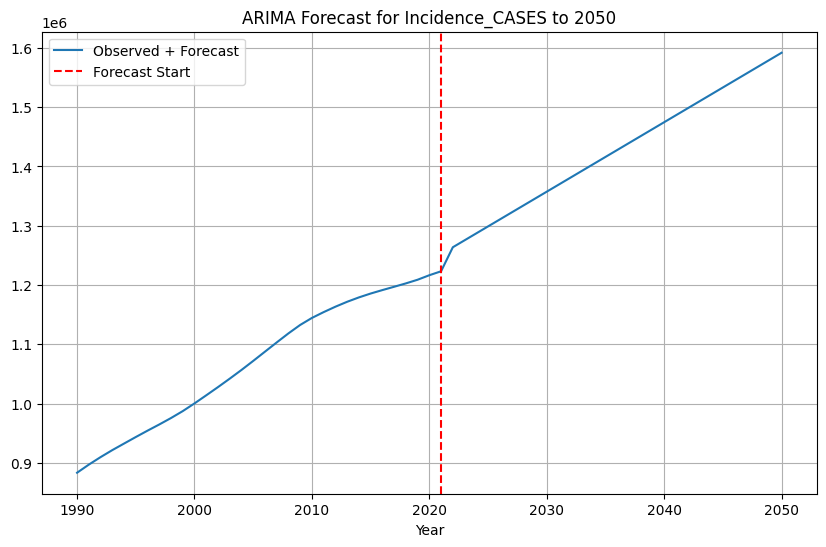

<Figure size 640x480 with 0 Axes>

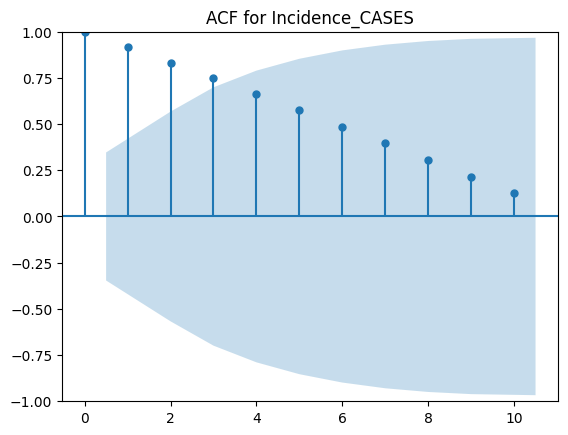

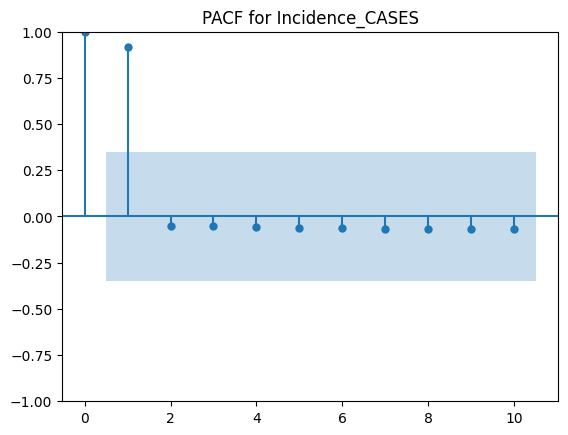

In [30]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/Incidence_CASES.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = SARIMAX(schizophrenia_data, order=(0,0,0), trend='ct')
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
plt.figure(figsize=(10, 5))
plt.plot(schizophrenia_data[:], label='Original')
plt.plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
plt.title(f'{file_name} In-Sample Fit')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.title(f'ARIMA Forecast for {file_name} to 2050')
plt.legend()
plt.grid()
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

#plot ACF and PACF
plot_acf(schizophrenia_data, lags=10)
plt.title(f'ACF for {file_name}')
plt.show()
plot_pacf(schizophrenia_data, lags=10)
plt.title(f'PACF for {file_name}')
plt.show()

Processing file: analysis_data/Prevalence_CASES.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=885.638, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2288.930, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=885.638, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.631 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                -439.819
Date:                Thu, 19 Jun 2025   AIC                            885.638
Time:                        11:31:15   BIC                            890.035
Sample:                             0   HQIC                           887.095
                                 - 3

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


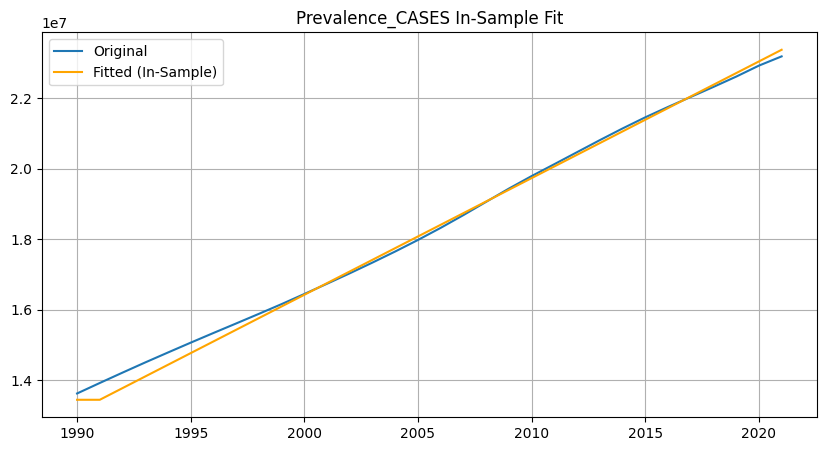

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

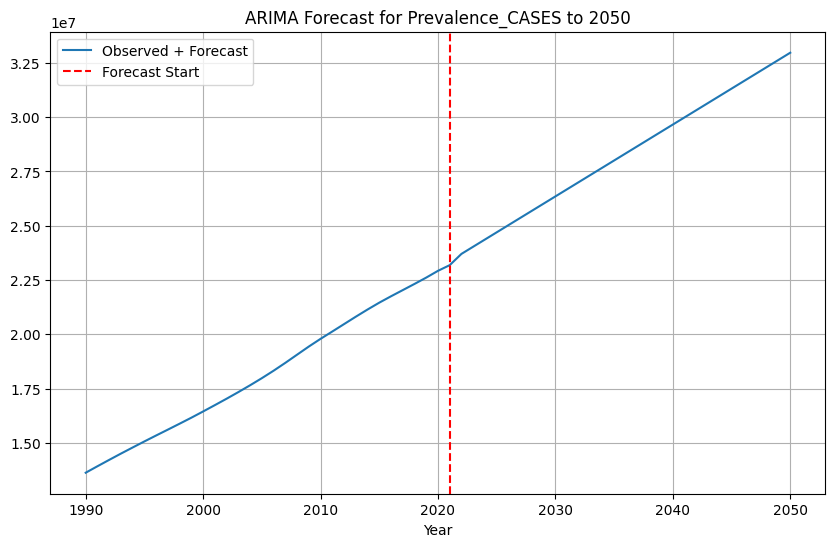

<Figure size 640x480 with 0 Axes>

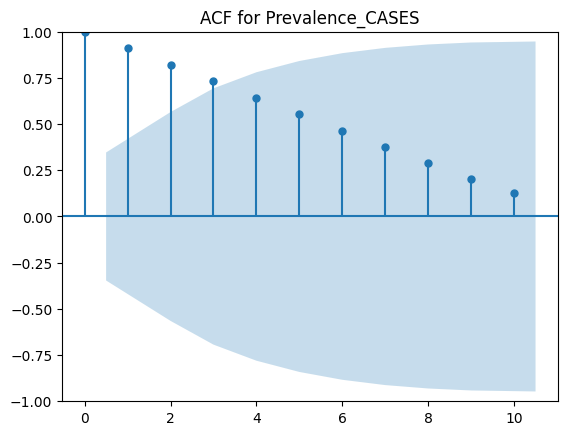

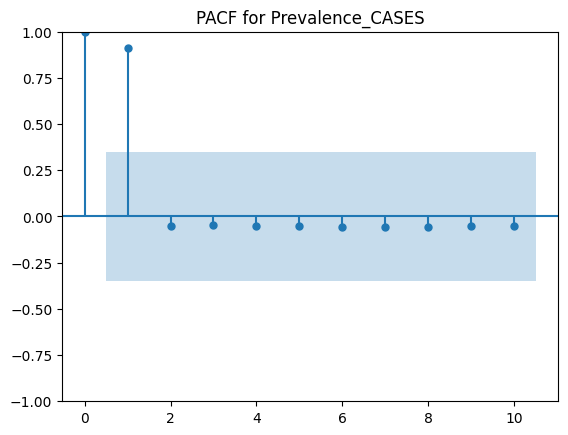

In [31]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/Prevalence_CASES.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = SARIMAX(schizophrenia_data, order=(0,0,0), trend='ct')
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
plt.figure(figsize=(10, 5))
plt.plot(schizophrenia_data[:], label='Original')
plt.plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
plt.title(f'{file_name} In-Sample Fit')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.title(f'ARIMA Forecast for {file_name} to 2050')
plt.legend()
plt.grid()
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

#plot ACF and PACF
plot_acf(schizophrenia_data, lags=10)
plt.title(f'ACF for {file_name}')
plt.show()
plot_pacf(schizophrenia_data, lags=10)
plt.title(f'PACF for {file_name}')
plt.show()

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    AGE STANDARDISED RATE (ASR) OF SCHIZOPHRENIA
</div>

Processing file: analysis_data/Prevalence_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=74.313, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5.313, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=74.313, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-34.806, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-34.472, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-35.507, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-28.551, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-33.307, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-30.731, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-29.871, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-35.507, Time=0.61 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.586 seco

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


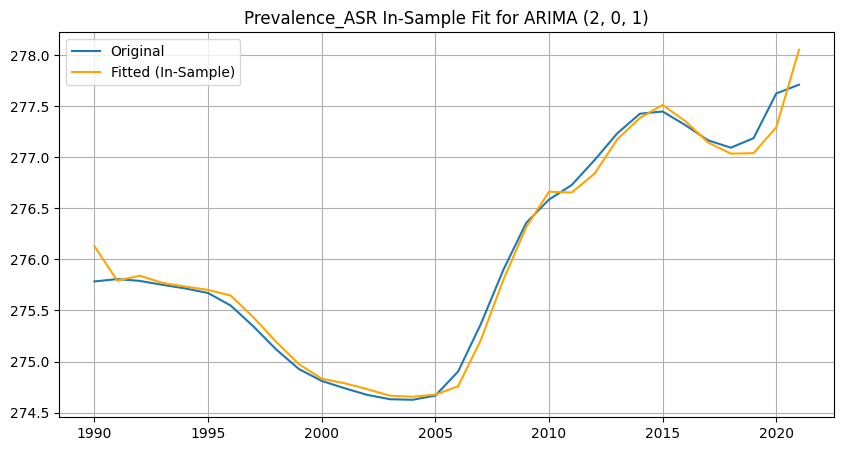

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

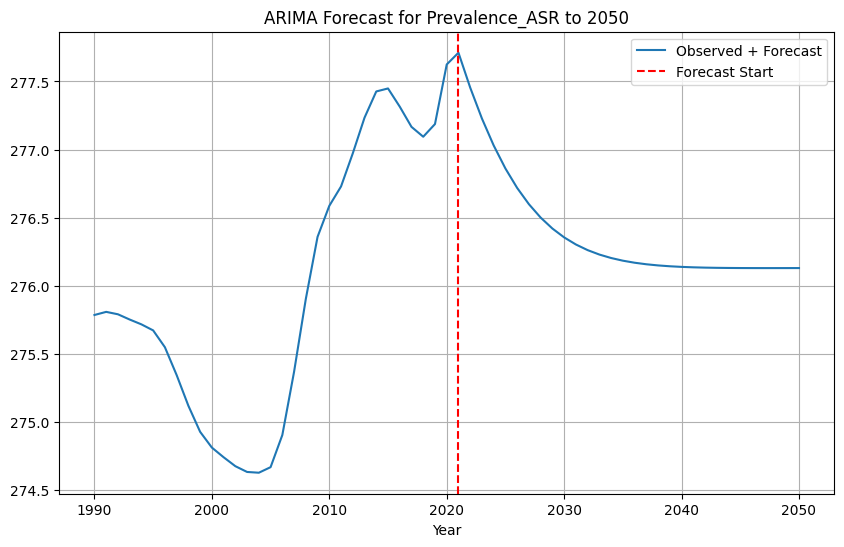

<Figure size 640x480 with 0 Axes>

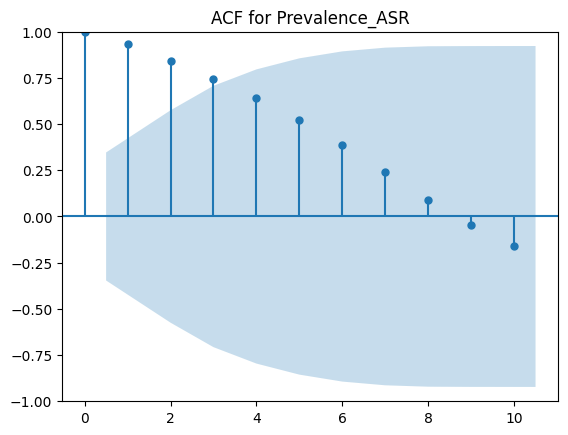

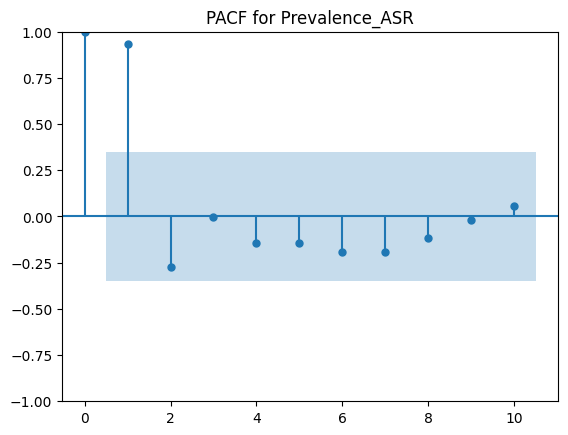

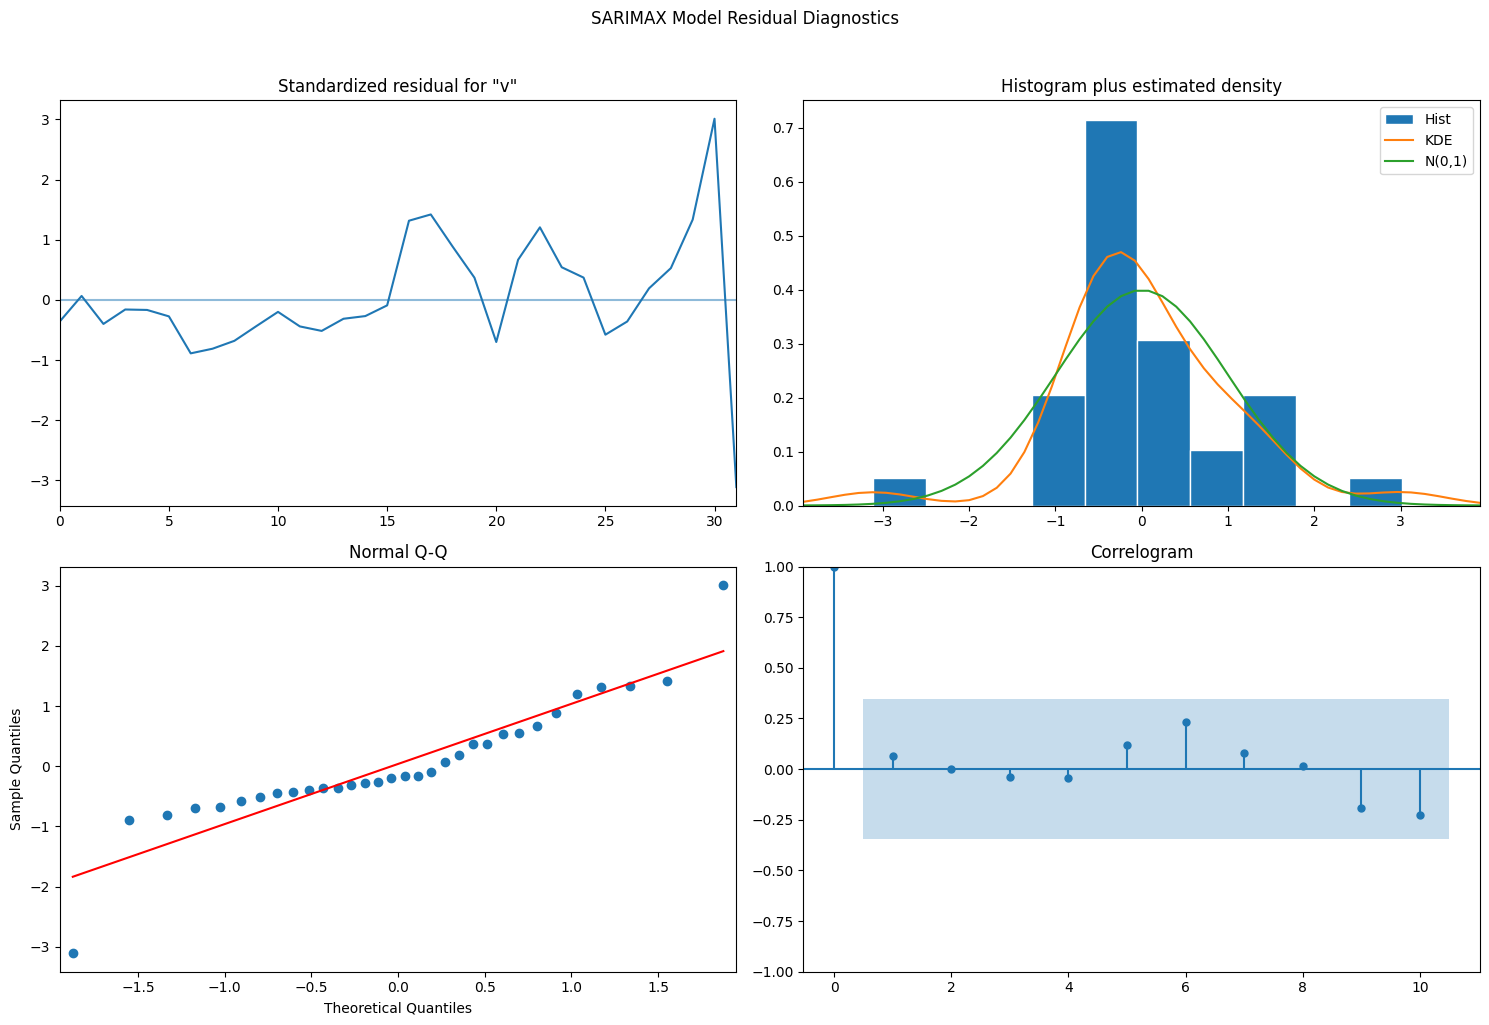

In [52]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/Prevalence_ASR.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = ARIMA(schizophrenia_data, order=model_auto.order)
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
plt.figure(figsize=(10, 5))
plt.plot(schizophrenia_data[:], label='Original')
plt.plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
plt.title(f'{file_name} In-Sample Fit for ARIMA {model_auto.order}')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.title(f'ARIMA Forecast for {file_name} to 2050')
plt.legend()
plt.grid()
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

#plot ACF and PACF
plot_acf(schizophrenia_data, lags=10)
plt.title(f'ACF for {file_name}')
plt.show()
plot_pacf(schizophrenia_data, lags=10)
plt.title(f'PACF for {file_name}')
plt.show()
fig = model_fit.plot_diagnostics(figsize=(15, 10))
plt.suptitle('SARIMAX Model Residual Diagnostics', y=1.02) # Add a main title
plt.tight_layout()
plt.show()

Processing file: analysis_data/Incidence_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-146.070, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-199.634, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-146.070, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-240.783, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-238.782, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-238.897, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-226.633, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-236.143, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-240.783, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.715 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:            

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    val   No. Observations:                   32
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 121.268
Date:                Thu, 19 Jun 2025   AIC                           -234.537
Time:                        19:51:02   BIC                           -228.674
Sample:                             0   HQIC                          -232.593
                                 - 32                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5265      0.067    230.674      0.000      15.395      15.658
ar.L1          1.8643      0.096     19.520      0.000       1.677       2.052
ar.L2         -0.8814      0.097     -9.041      0.0

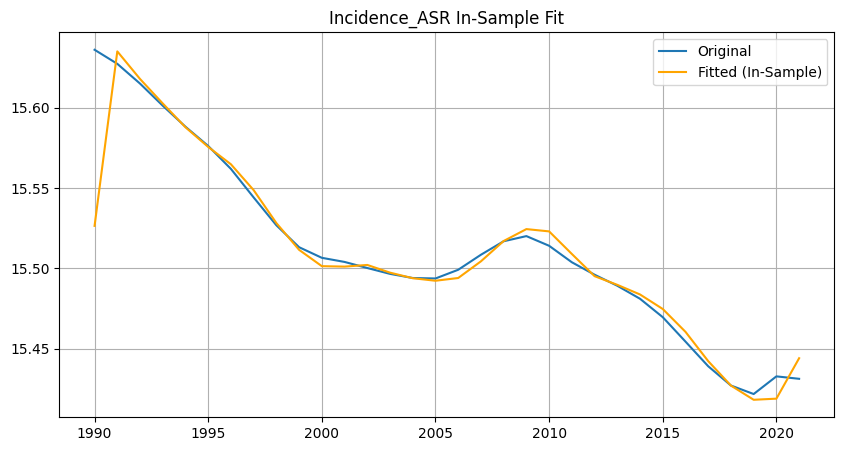

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 640x480 with 0 Axes>

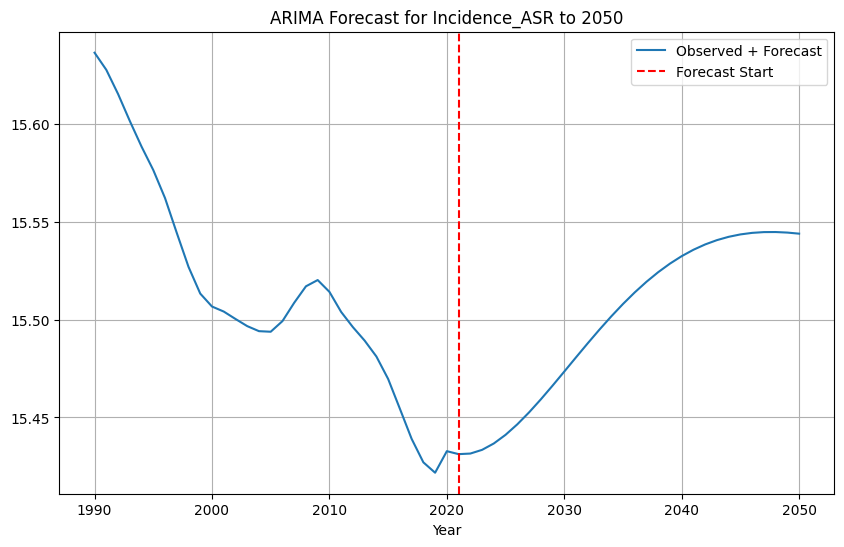

<Figure size 640x480 with 0 Axes>

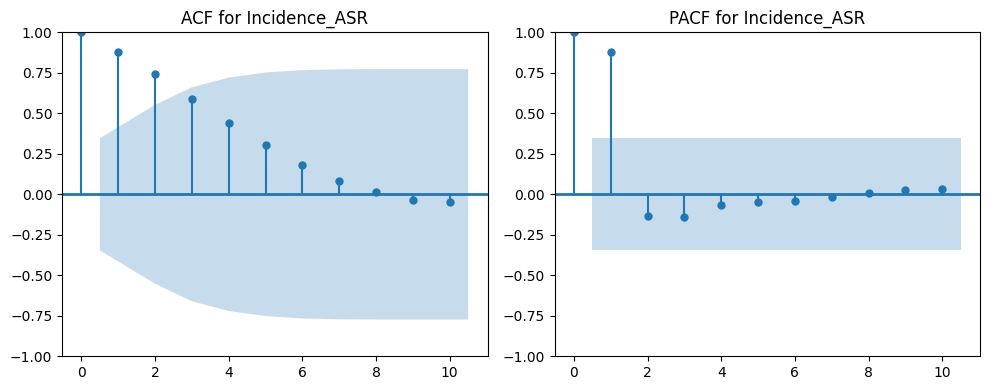

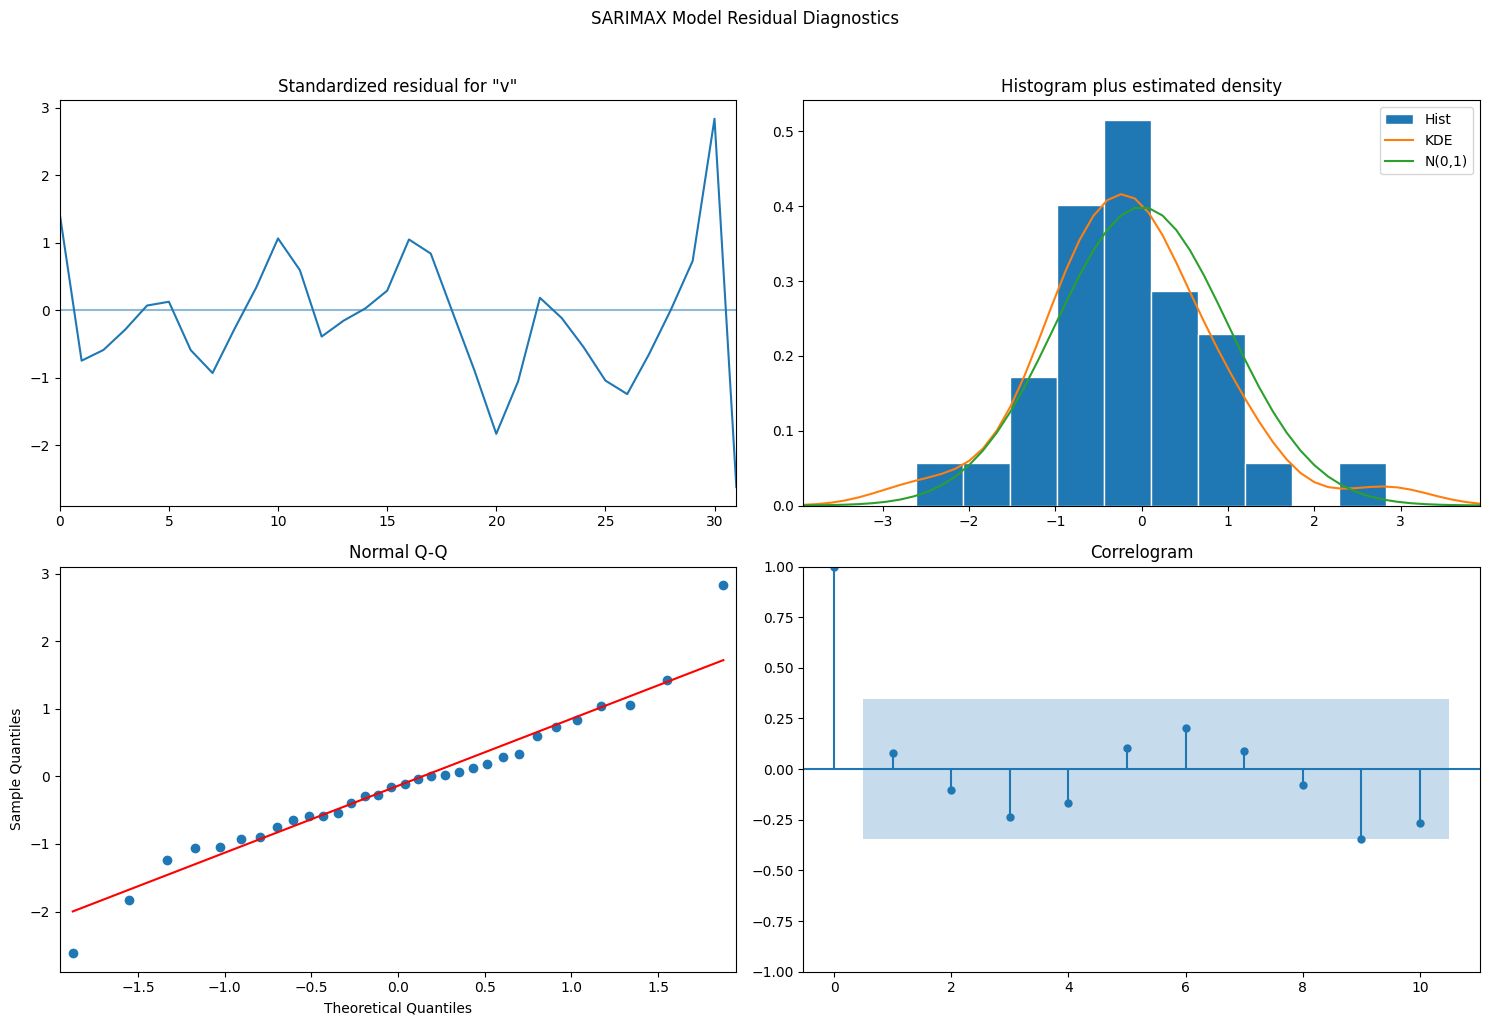

In [77]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/Incidence_ASR.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = ARIMA(schizophrenia_data, order=model_auto.order)
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
plt.figure(figsize=(10, 5))
plt.plot(schizophrenia_data[:], label='Original')
plt.plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
plt.title(f'{file_name} In-Sample Fit')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')
# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.title(f'ARIMA Forecast for {file_name} to 2050')
plt.legend()
plt.grid()
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

# Plot ACF and PACF next to each other
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(schizophrenia_data, lags=10, ax=axes[0], linewidth=2)
axes[0].set_title(f'ACF for {file_name}')
plot_pacf(schizophrenia_data, lags=10, ax=axes[1], linewidth=2)
axes[1].set_title(f'PACF for {file_name}')
plt.tight_layout()
plt.show()

fig = model_fit.plot_diagnostics(figsize=(15, 10))
plt.suptitle('SARIMAX Model Residual Diagnostics', y=1.02) # Add a main title
plt.tight_layout()
plt.show()

Processing file: analysis_data/DALYs_ASR.csv
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.804, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-26.130, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=45.804, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-68.066, Time=1.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-67.385, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-68.250, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-47.410, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-64.637, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-66.299, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-49.796, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-46.269, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-68.250, Time=0.39 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 4.307 seco

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

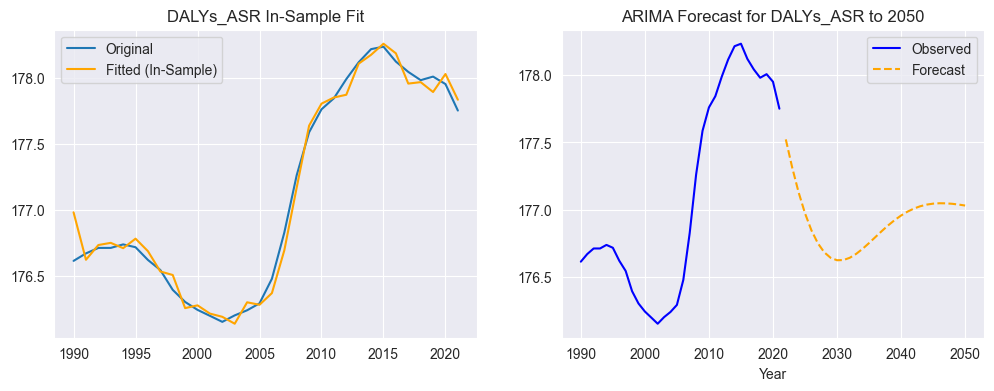

<Figure size 640x480 with 0 Axes>

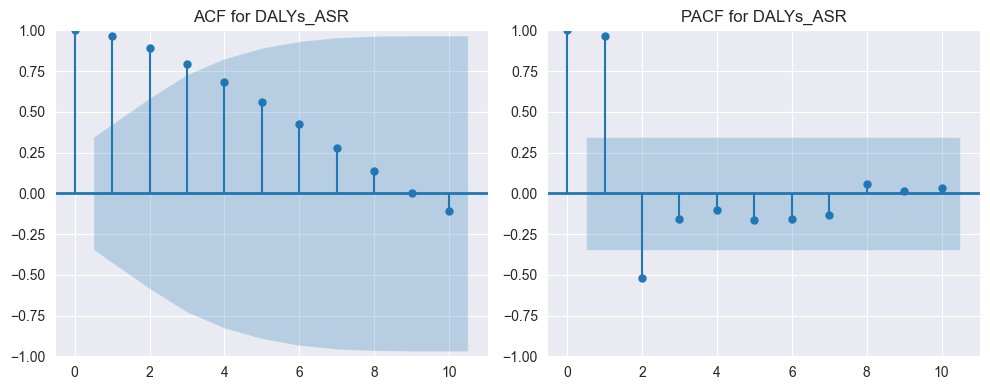

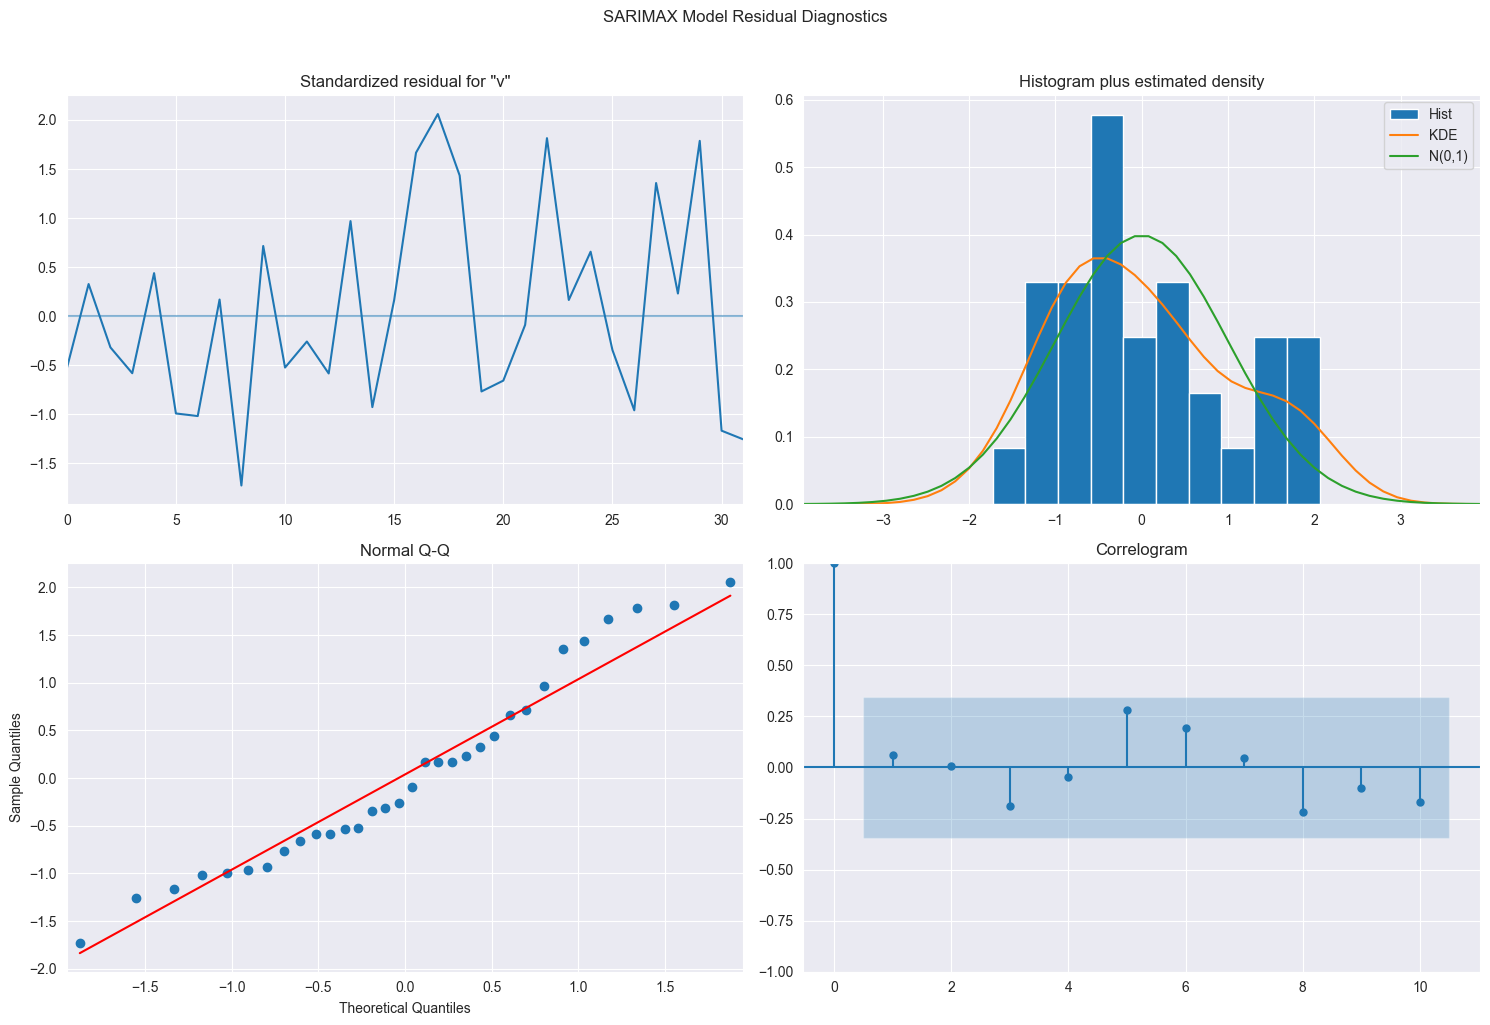

In [8]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import pmdarima as pm
# Load the dataset
file_path = 'analysis_data/DALYs_ASR.csv'
print(f"Processing file: {file_path}")
file_name = file_path.split('/')[-1].split('.')[0]
df = pd.read_csv(file_path)
df = df[df['sex_id'] == 3][['year', 'val']].dropna()
df = df.sort_values(by='year')
df = df.set_index('year')
schizophrenia_data = df

# Fit ARIMA model using auto_arima
model_auto = pm.auto_arima(schizophrenia_data,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           seasonal=True,
                           d=0,  # Auto-difference
                           trace=True,
                           trend='ct',  # Include a constant and trend
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())



# Fit the model
model = ARIMA(schizophrenia_data, order=model_auto.order)
model_fit = model.fit(cov_type='robust')
# Print model summary
print(model_fit.summary())
fitted_values = model_fit.fittedvalues


# Save summary to a .txt file
with open(f'analysis_data/{file_name}_arima_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))

# Plot the original data and fitted values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(schizophrenia_data[:], label='Original')
axes[0].plot(fitted_values[:], label='Fitted (In-Sample)', color='orange')
axes[0].set_title(f'{file_name} In-Sample Fit')
axes[0].legend()
axes[0].grid(True)
# plt.show()
# plt.savefig(f'analysis_data/{file_name}_in_sample_fit.png')

# Forecast to 2050
forecast_years = list(range(2022, 2051))
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.predicted_mean
# Combine forecast with original data
forecast_df = pd.DataFrame({'year': forecast_years, 'val': forecast_values})
combined_df = pd.concat([schizophrenia_data.reset_index(), forecast_df], ignore_index=True)
# Separate observed and forecasted data
observed_df = combined_df[combined_df['year'] <= 2021]
forecasted_df = combined_df[combined_df['year'] > 2021]

# Plot the results
axes[1].plot(observed_df['year'], observed_df['val'], label='Observed', color='blue')
axes[1].plot(forecasted_df['year'], forecasted_df['val'], label='Forecast', color='orange', linestyle='--')
axes[1].set_xlabel('Year')
axes[1].set_title(f'ARIMA Forecast for {file_name} to 2050')
axes[1].legend()
axes[1].grid(True)
plt.show()
plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')
# # Plot the results
# # plt.figure(figsize=(10, 6))
# axes[1].plot(combined_df['year'], combined_df['val'], label='Observed + Forecast')
# axes[1].axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
# axes[1].set_xlabel('Year')
# axes[1].set_title(f'ARIMA Forecast for {file_name} to 2050')
# axes[1].legend()
# axes[1].grid(True)
# plt.show()
# plt.savefig(f'analysis_data/{file_name}_arima_forecast.png')

# Plot ACF and PACF next to each other
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(schizophrenia_data, lags=10, ax=axes[0], linewidth=2)
axes[0].set_title(f'ACF for {file_name}')
plot_pacf(schizophrenia_data, lags=10, ax=axes[1], linewidth=2)
axes[1].set_title(f'PACF for {file_name}')
plt.tight_layout()
plt.show()

fig = model_fit.plot_diagnostics(figsize=(15, 10))
plt.suptitle('SARIMAX Model Residual Diagnostics', y=1.02) # Add a main title
plt.tight_layout()
plt.show()

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    AGE STANDARDISED RATE (ASR) OF SCHIZOPHRENIA\
    ALL 3 GENDER ID
</div>

Processing sex_id: 1
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=428.014, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.052, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.883, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-20.786, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-18.988, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-18.952, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13.767, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-16.838, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.630 seconds
                               SARIMAX Results                                
Dep. Variable:    

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24.462, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-22.933, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-34.367, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-30.095, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-37.543, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-40.043, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-35.349, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-36.997, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-35.510, Ti

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=76.565, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-23.308, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-65.706, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-66.689, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-66.481, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-63.010, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-66.824, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-48.152, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-65.438, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-57.981, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-36.379, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-54.202, Time=0.06 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] i

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

<Figure size 1200x600 with 0 Axes>

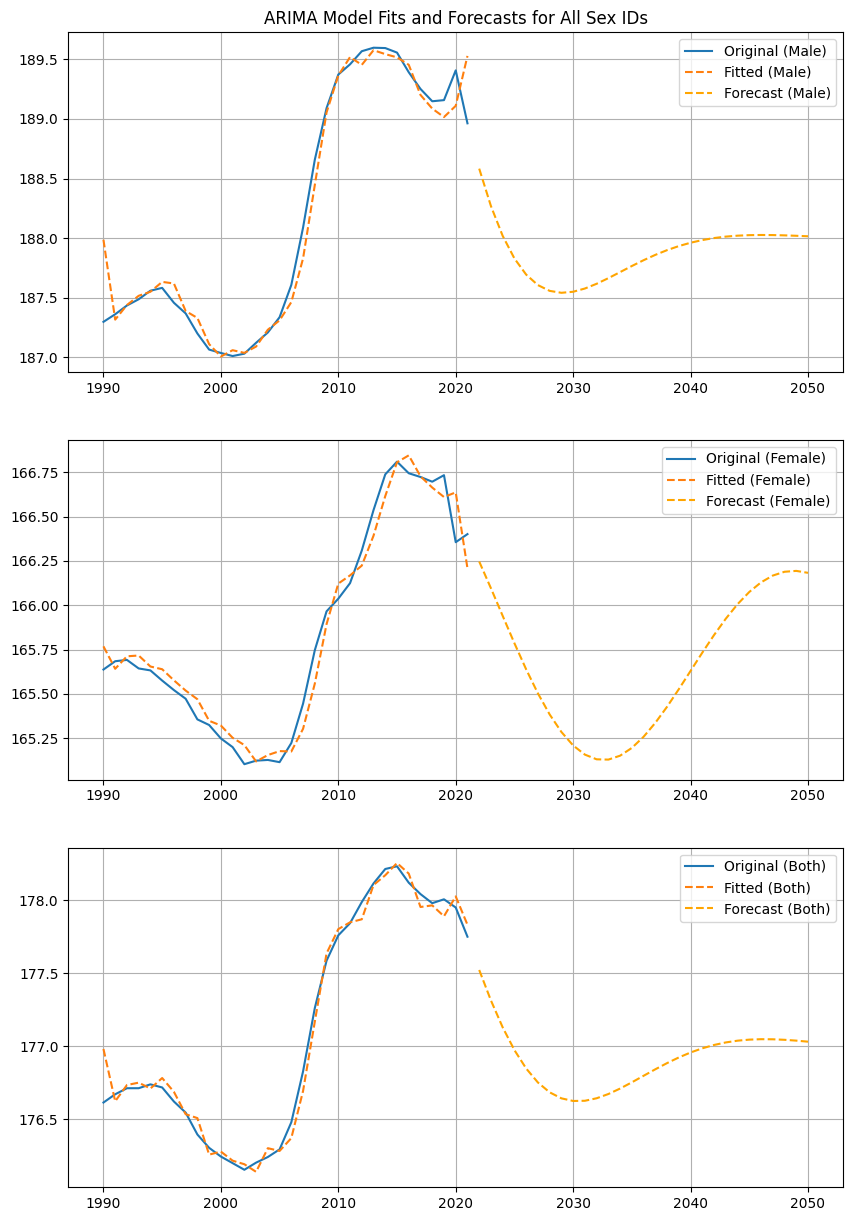

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Read data
file_path = 'analysis_data/DALYs_ASR_GENDERED.csv'
df = pd.read_csv(file_path)

forecast_years = list(range(2022, 2051))
plt.figure(figsize=(12, 6))
gender = ["Male", "Female", "Both"]
sex_ids = [1, 2, 3]
fig, axes = plt.subplots(len(sex_ids), 1, figsize=(10, 15))

for i, sex_id in enumerate(sex_ids):
    print(f"Processing sex_id: {sex_id}")
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year').set_index('year')

    # Fit ARIMA model using auto_arima
    model_auto = pm.auto_arima(sex_data,
                               start_p=0, start_q=0,
                               max_p=5, max_q=5,
                               seasonal=False,
                               d=0,          # Auto-difference
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

    # print(model_auto.summary())

    # Fit the model
    model = ARIMA(sex_data, order=model_auto.order)
    model_fit = model.fit(cov_type='robust')
    print(model_fit.summary())

    # Get fitted values
    fitted_values = model_fit.fittedvalues

    # Forecast to 2050
    forecast = model_fit.get_forecast(steps=len(forecast_years))
    forecast_values = forecast.predicted_mean

    # Plot original series, fitted values, and forecast
    axes[i].plot(sex_data.index, sex_data['val'], label=f'Original ({gender[i]})')
    axes[i].plot(fitted_values.index, fitted_values, label=f'Fitted ({gender[i]})', linestyle='--')
    axes[i].plot(forecast_years, forecast_values, label=f'Forecast ({gender[i]})', linestyle='dashed', color='orange')
    axes[i].grid()
    axes[i].legend()
    # axes[i].set_xlabel('Year')

# Add labels, legend, and grid
# plt.axvline(x=2021, color='red', linestyle='--', label='Forecast Start')
axes[0].set_title('ARIMA Model Fits and Forecasts for All Sex IDs')
plt.show()